In [26]:
import os
import numpy as np
import deepdish as dd
import pandas as pd
import nibabel as nb
import Functional_Fusion.dataset as fdata # from functional fusion module
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import cortico_cereb_connectivity.data as cdata
import cortico_cereb_connectivity.cio as cio
import cortico_cereb_connectivity.summarize as cs
import cortico_cereb_connectivity.scripts.script_summarize_weights as cssw
import matplotlib.pyplot as plt
import seaborn as sns
import Functional_Fusion.atlas_map as am
import nitools as nt
from pathlib import Path
import warnings
import SUITPy as suit
fig_dir =  '/Users/jdiedrichsen/Dropbox/Talks/2025/07_Gordon/Gordon_connectivity/figure_parts'

# Summarize the pattern of cortical-cerebellar connectivity weights by yeo-region

In [27]:
yeo_img = nb.load(gl.conn_dir + f'/maps/yeo17_Icosahedron1002.plabel.nii')
yeo_data = yeo_img.get_fdata().squeeze()
label_dict = yeo_img.header.get_axis(0).label[0]


KeyboardInterrupt: 

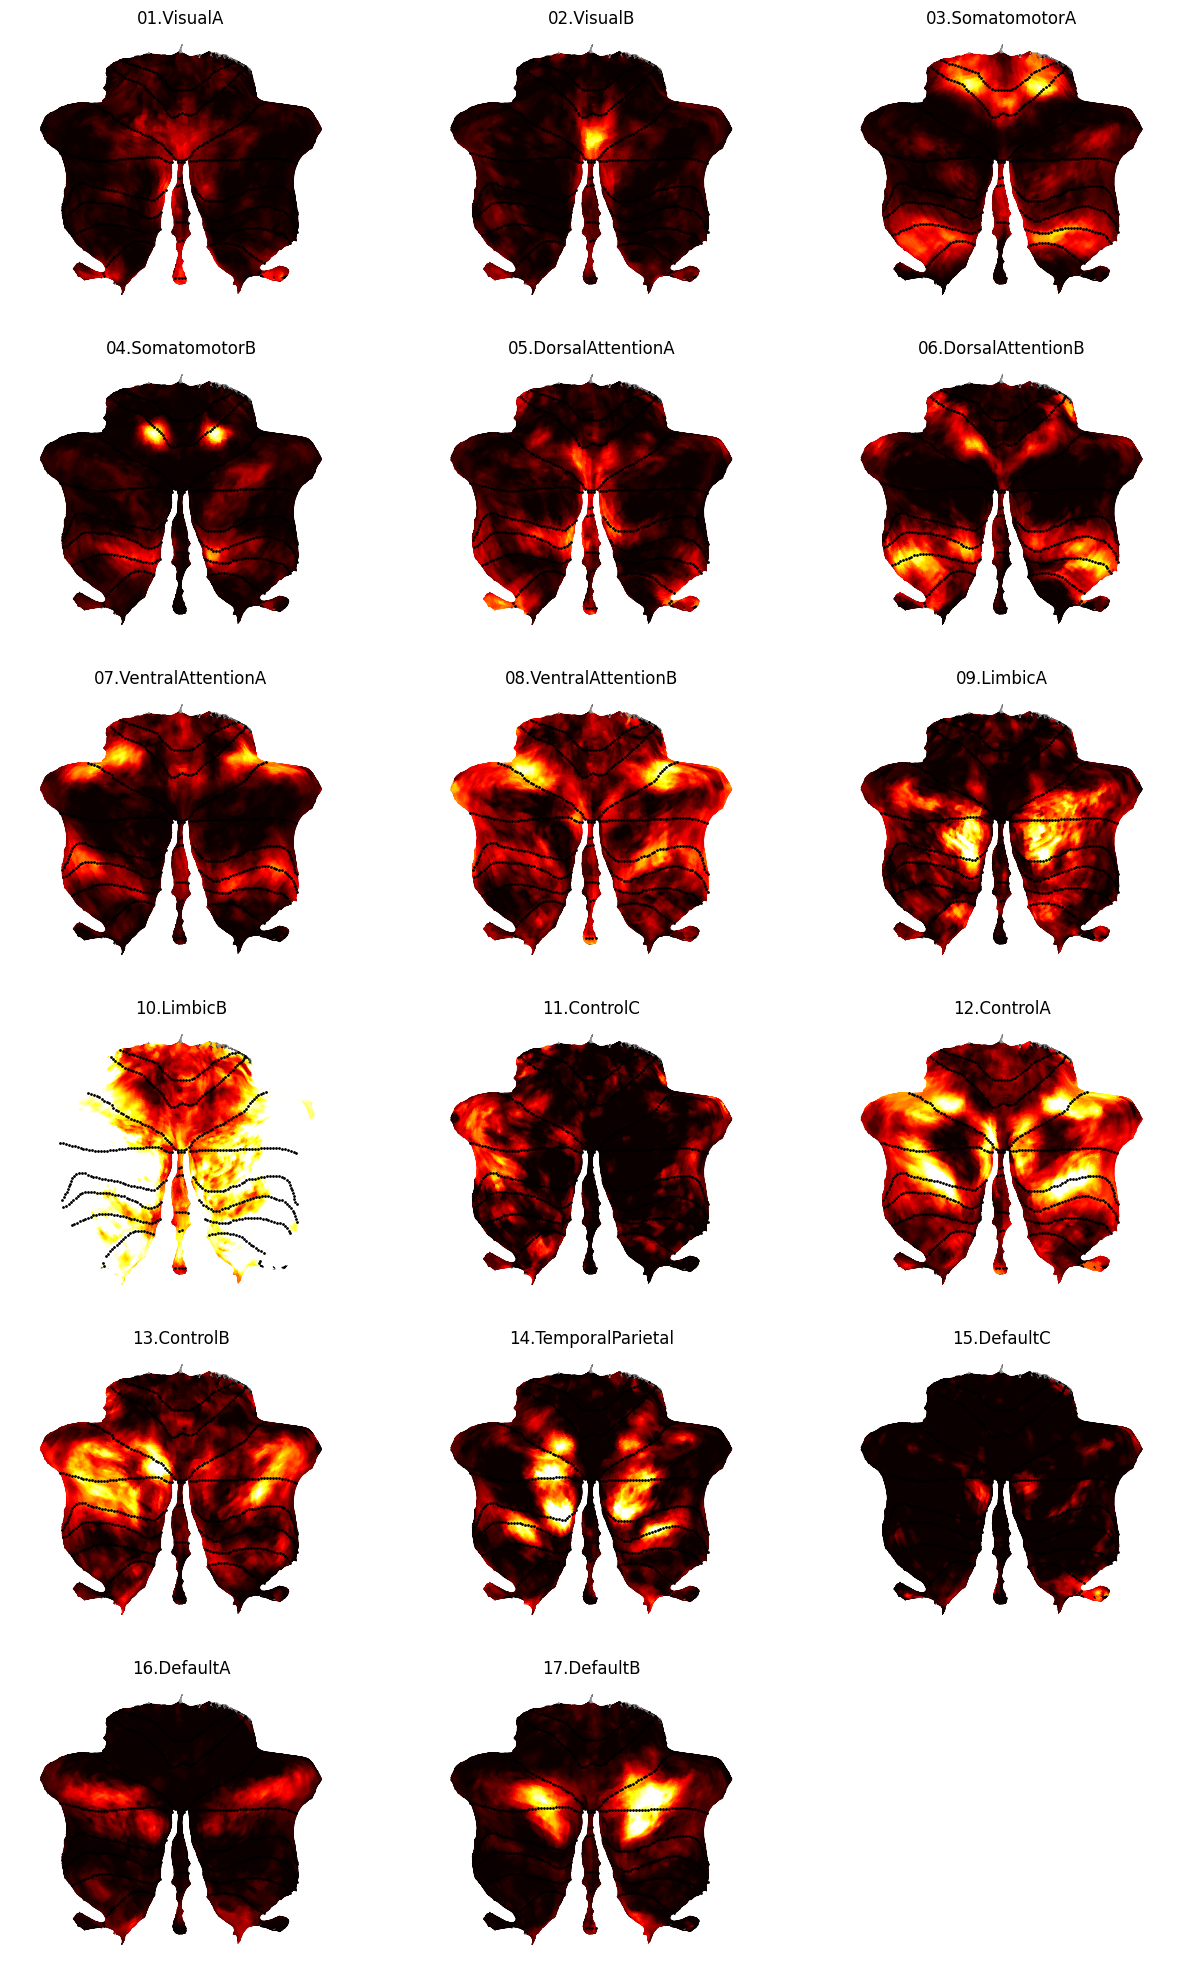

In [30]:
traindata = 'MdWfIbDeHtNiSoScLa'
cortex_roi = "Icosahedron1002"
method = 'NNLS'
model,_ = cs.get_model(traindata,cortex_roi,method,extension='A2_group')
atlas,ainf = am.get_atlas('MNISymC3')
plt.figure(figsize=(15, 25))
for i in range(17):
    plt.subplot(6,3,i+1) 
    project = model.coef_[:,yeo_data== i+1].mean(axis=1)
    nifti_image = atlas.data_to_nifti(project)
    data = suit.vol_to_surf(nifti_image,space='MNISymC')
    suit.flatmap.plot(data,cmap='hot',cscale=[0,0.003],new_figure=False)
    plt.title(label_dict[i+1][0])
plt.savefig(os.path.join(fig_dir,'yeo17_weights.png'),dpi=300,bbox_inches='tight')

## Other analyeses to do: 

* Lesion approach: Used a trained model and drop on of the cortical yeo networks at a time from makin the prediction - 
* Where is the cerebellum and for which tasks does the prediction suffer most? 
